# DATA UNDERSTANDING

# Bank Dataset Analyzer

This class, `DatasetAnalyzer`, is designed to analyze a dataset related to banking. It provides various methods to gather insights about the dataset, identify patterns, and address data quality issues. This class is part of a broader data analysis and preprocessing process.

## How It Works

### Initialization

1. Import the necessary libraries: `pandas`, `matplotlib.pyplot`, `seaborn`, and `numpy`.

2. Define a class named `DatasetAnalyzer` that takes the path to the dataset as a parameter during initialization (`dataset_path`).

3. Inside the `__init__` method, the dataset is loaded using `pd.read_csv()` and stored as an attribute (`self.dataset`).

### Data Exploration and Analysis Methods

The class provides several methods to explore and analyze the dataset:

- `preview_dataset(num_rows)`: Displays the first and last few rows of the dataset.

- `check_columns_list()`: Returns a list of columns in the dataset.

- `explore_column_value_counts()`: Prints the value counts for each column in the dataset.

- `get_dataset_shape()`: Returns the number of rows and columns in the dataset.

- `get_dataset_info()`: Displays information about the dataset, including data types and memory usage.

- `get_dataset_description()`: Provides a statistical description of the dataset, including measures like mean, min, max, and quartiles.

- `analyze_duplicated_rows()`: Counts and visualizes the percentage of duplicated rows in the dataset.

- `analyze_missing_values()`: Counts and visualizes the percentage of missing values for each column in the dataset.

- `count_data_types()`: Returns the count of data types present in the dataset.

- `count_unique_values_by_dtype()`: Counts and prints the number of unique values for integer, float, and object columns.

Each method is designed to provide insights into different aspects of the dataset, helping to identify data quality issues, patterns, and trends.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class DatasetAnalyzer:
    def __init__(self, dataset_path, delimiter=',', encoding='utf-8'):
        # Initialize the DatasetAnalyzer with the dataset path, delimiter, and encoding
        self.dataset_path = dataset_path
        self.delimiter = delimiter
        self.encoding = encoding
        self.dataset = pd.read_csv(dataset_path, delimiter=self.delimiter, encoding=self.encoding)

    def preview_dataset(self, num_rows=5):
        # Display the first few and last few rows of the dataset
        print(f"Preview of the dataset (first {num_rows} rows):")
        print(self.dataset.head(num_rows))
        print(f"Preview of the dataset (last {num_rows} rows):")
        print(self.dataset.tail(num_rows))

    def check_columns_list(self):
        # Get the list of columns in the dataset
        return self.dataset.columns.tolist()

    def explore_column_value_counts(self):
        # Explore the value counts for each column
        column_value_counts = {}

        for column in self.dataset.columns:
            column_value_counts[column] = self.dataset[column].value_counts()

        for column, values in column_value_counts.items():
            print(f"Value Counts for Column '{column}':\n{values}\n")

    def get_dataset_shape(self):
        # Get the shape of the dataset
        return self.dataset.shape

    def get_dataset_info(self):
        # Get information about the dataset
        return self.dataset.info()

    def get_dataset_description(self):
        # Get a statistical description of the dataset
        return self.dataset.describe()

    def analyze_duplicated_rows(self):
        # Analyze duplicate rows
        duplicate_count = self.dataset.duplicated().sum()

        # Print duplicate rows count
        print("Duplicate Rows Count:", duplicate_count)

        # Calculate the percentage of duplicate rows
        duplicate_percentage = (duplicate_count / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of duplicate rows
        plt.figure(figsize=(6, 4))
        sns.barplot(x=["Duplicate Rows", "Non-Duplicate Rows"],
                    y=[duplicate_percentage, 100 - duplicate_percentage], color='skyblue', edgecolor='black')
        plt.ylabel("Percentage (%)")
        plt.title("Percentage of Duplicated Rows")
        plt.tight_layout()
        plt.show()

    def analyze_missing_values(self):
        # Analyze missing values
        missing_values_count = self.dataset.isnull().sum()

        # Print missing values counts
        print("Missing Values Counts:")
        print(missing_values_count)

         # Calculate the percentage of missing values for each column
        missing_percentage = (self.dataset.isnull().sum() / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of missing values
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue', edgecolor='black')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Percentage of Missing Values in Each Column')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def count_data_types(self):
        # Count the data types in the dataset
        return self.dataset.dtypes.value_counts()

    def count_unique_values_by_dtype(self):
         # Group columns by data type
        data_types = self.dataset.dtypes

        # Separate columns by data type
        int_columns = data_types[data_types == 'int64'].index
        float_columns = data_types[data_types == 'float64'].index
        object_columns = data_types[data_types == 'object'].index

        print("Unique Values Counts by Data Type:")

        # Print columns and their counts for each data type
        print("Integer Columns:")
        print(self.dataset[int_columns].nunique())

        print("\nFloat Columns:")
        print(self.dataset[float_columns].nunique())

        print("\nObject Columns:")
        print(self.dataset[object_columns].nunique())

In [13]:
# Create an instance of DatasetAnalyzer
analyzer = DatasetAnalyzer("data/car_purchasing.csv", encoding='latin1')




In [14]:
# Preview the dataset
analyzer.preview_dataset()

Preview of the dataset (first 5 rows):
     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078     

In [15]:
# Get the list of columns in the dataset
columns_list = analyzer.check_columns_list()
print("Columns in the dataset:", columns_list)

Columns in the dataset: ['customer name', 'customer e-mail', 'country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']


In [16]:
# Explore value counts for each column
analyzer.explore_column_value_counts()

Value Counts for Column 'customer name':
Walter                 2
Seth                   2
Olivia                 1
Ulysses Craig          1
Kaitlin                1
                      ..
Adrienne               1
Armstrong, Hedda N.    1
Gloria                 1
Stone Hunt             1
Penelope               1
Name: customer name, Length: 498, dtype: int64

Value Counts for Column 'customer e-mail':
elit.elit.fermentum@erosturpisnon.org    1
non.sapien@seddictumeleifend.edu         1
blandit@nunc.org                         1
nonummy@ornareelitelit.org               1
metus.vitae@Morbisitamet.ca              1
                                        ..
Curabitur.consequat@miDuisrisus.com      1
est.congue@Nunc.edu                      1
nec@nuncest.com                          1
felis@orciconsectetuereuismod.ca         1
sociis@vulputateveliteu.com              1
Name: customer e-mail, Length: 500, dtype: int64

Value Counts for Column 'country':
Israel         6
Bolivia        6
M

In [17]:
# Get the shape of the dataset
dataset_shape = analyzer.get_dataset_shape()
print("Shape of the dataset:", dataset_shape)

Shape of the dataset: (500, 9)


In [18]:
# Get information about the dataset
dataset_info = analyzer.get_dataset_info()
print("Information about the dataset:")
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
Information about the dataset:
None


In [19]:
# Get a statistical description of the dataset
dataset_description = analyzer.get_dataset_description()
print("Statistical description of the dataset:")
print(dataset_description)

Statistical description of the dataset:
           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867488   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max  

Duplicate Rows Count: 0


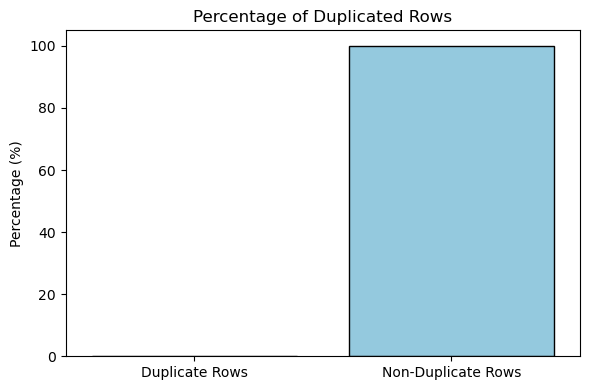

In [20]:
# Analyze duplicate rows and visualize the percentage
analyzer.analyze_duplicated_rows()

Missing Values Counts:
customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


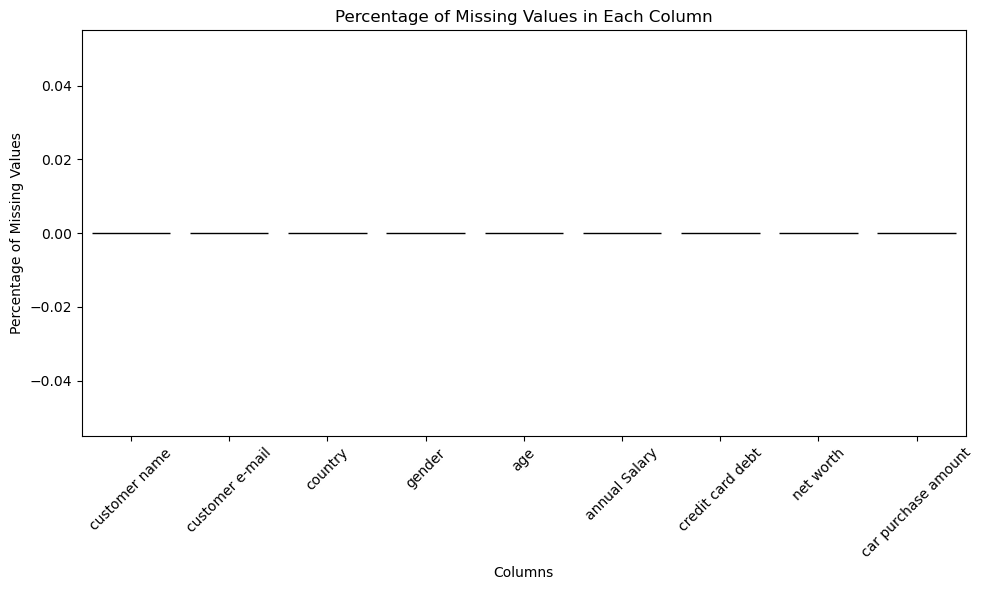

In [21]:
# Analyze missing values and visualize the percentage
analyzer.analyze_missing_values()

In [22]:
# Count data types in the dataset
data_type_counts = analyzer.count_data_types()
print("Data types counts:")
print(data_type_counts)

Data types counts:
float64    5
object     3
int64      1
dtype: int64


In [23]:
# Count unique values by data type
analyzer.count_unique_values_by_dtype()

Unique Values Counts by Data Type:
Integer Columns:
gender    2
dtype: int64

Float Columns:
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

Object Columns:
customer name      498
customer e-mail    500
country            211
dtype: int64


EDA